In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_boleta = pd.read_csv('boletas.csv')
df_clientes = pd.read_csv('clientes.csv', encoding='latin1')
df_detalle = pd.read_csv('detalle.csv')
df_productos = pd.read_csv('productos.csv', encoding='latin1')


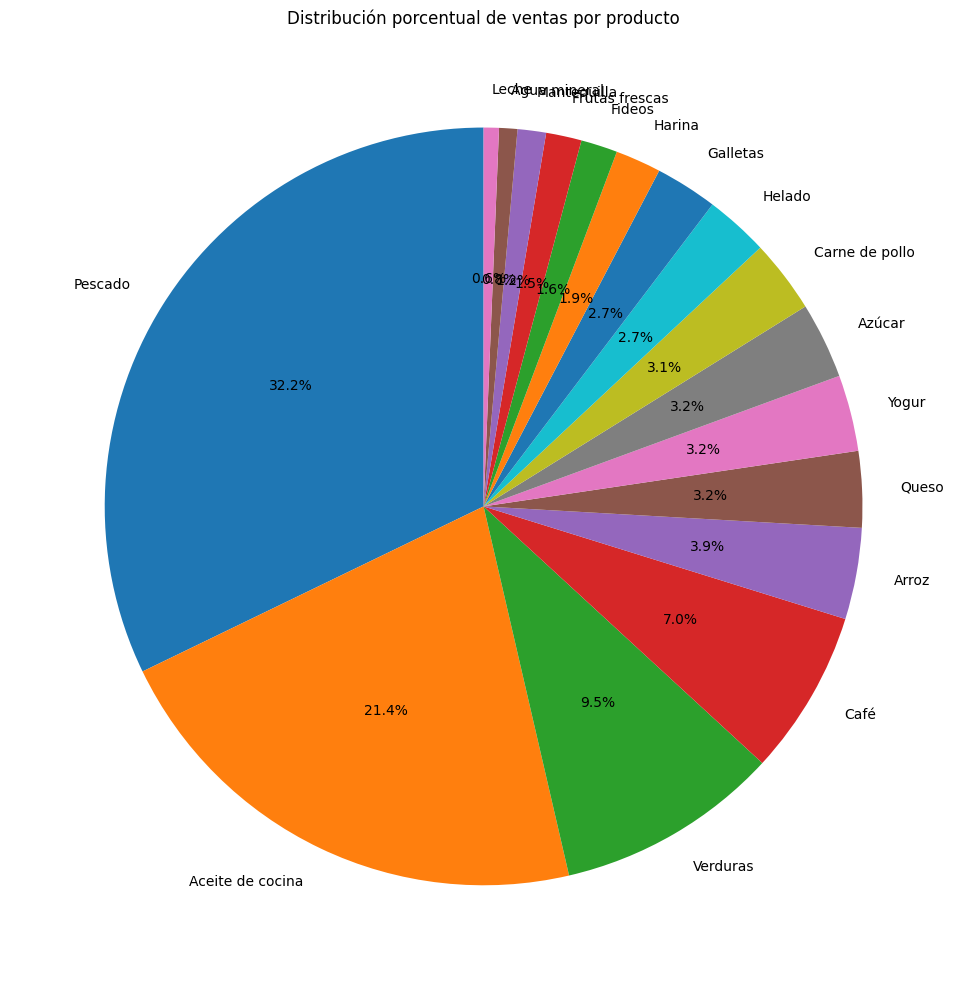

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV
df_detalle = pd.read_csv('detalle.csv')
df_productos = pd.read_csv('productos.csv', encoding='latin1')

#Ahora se crea un dataframe juntando los dos archivos anteriores 
detalle_productos = pd.merge(df_detalle, df_productos, left_on='codigo_producto', right_on='codigo')

# Luego se calcular el total de ventas por producto con una tabla dinámica 
detalle_productos['total_venta'] = detalle_productos['cantidad'] * detalle_productos['precio']
'''ventas_por_producto = detalle_productos.groupby('nombre')['total_venta'].sum()
'''
tabla_dinamica = pd.pivot_table(detalle_productos, index='nombre', values='total_venta', aggfunc='sum').sort_values(by='total_venta', ascending=False)
# Graficar

tabla_dinamica.plot(kind='pie',y='total_venta', autopct='%1.1f%%', startangle=90, legend=False, figsize=(10, 10))
plt.title('Distribución porcentual de ventas por producto')
plt.ylabel('')
plt.tight_layout()
plt.show()

